In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import six
import numpy as np

sns.set_palette("colorblind")
#sns.set_palette("hls")

In [24]:
def parse_json(filename):
    with open(filename, 'r') as f:
        # replace single quote to double quote
        if six.PY2:
            import string
            string_mod = string
        else:
            string_mod = str
        data = [json.loads(line.translate(string_mod.maketrans('\'', '\"'))) for line in f]
        
    train = {
        'itr': np.asarray([d['iteration'] for d in data if 'iteration' in d]),
        'loss': np.asarray([d['loss'] for d in data if 'iteration' in d]),
        'accuracy': np.asarray([d['accuracy'] for d in data if 'iteration' in d])
    }
    
    test = {
        'loss': np.asarray([d['loss'] for d in data if ('type' in d) and (d['type']=='test')]),
        'accuracy': np.asarray([d['accuracy'] for d in data if ('type' in d) and (d['type']=='test')]),
    }
    test['itr'] = np.linspace(train['itr'].min(), train['itr'].max(), num=len(test['loss']))
    
    return train, test

In [25]:
train_result, test_result = parse_json('./caltech101_2016-08-04-04-09-12.json')

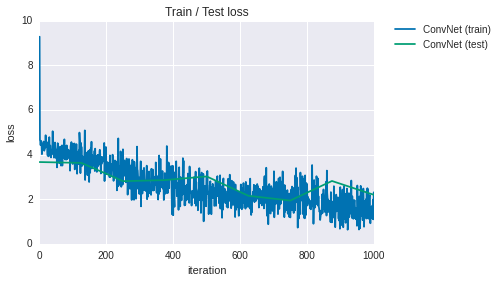

In [26]:
plt.hold(True)
plt.plot(train_result['itr'], train_result['loss'], label='ConvNet (train)')
plt.plot(test_result['itr'], test_result['loss'], label='ConvNet (test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Train / Test loss')
plt.xlabel('iteration')
plt.ylabel('loss')

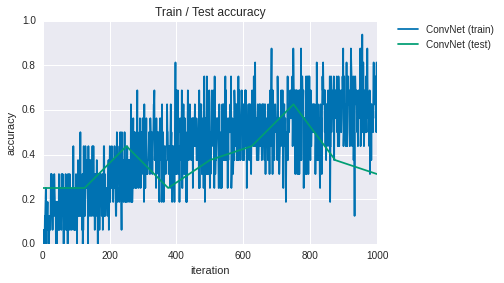

In [27]:
plt.hold(True)
plt.plot(train_result['itr'], train_result['accuracy'], label='ConvNet (train)')
plt.plot(test_result['itr'], test_result['accuracy'], label='ConvNet (test)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Train / Test accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')